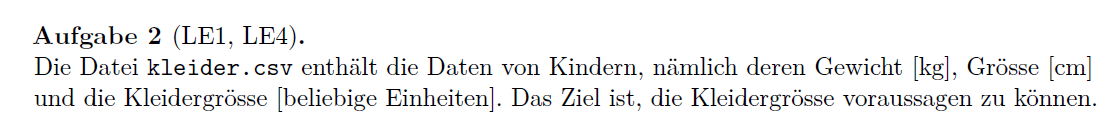

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
import statsmodels.api as sm

In [3]:
# Datein einlesen
kleider = pd.read_csv("kleider.csv", index_col="Unnamed: 0")

# Kopfzeile ausgeben
kleider.head(5)

,groesse,gewicht,kleidergroesse
1,107.4,18.0,37.0
2,159.4,42.1,49.5
3,94.1,16.0,34.5
4,99.1,13.5,36.0
5,114.2,23.4,43.0


In [18]:
kleider.shape

(12, 3)

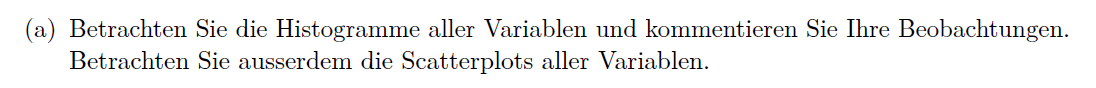

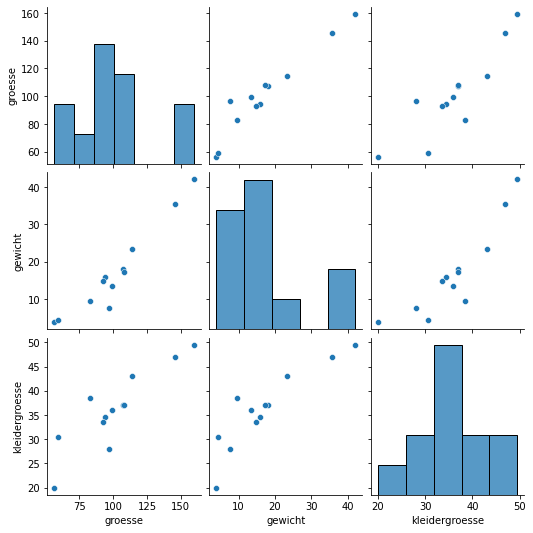

In [21]:
sns.pairplot(kleider)
plt.show()

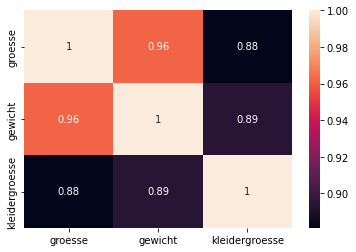

In [26]:
sns.heatmap(kleider.corr(), annot=True)
plt.show()

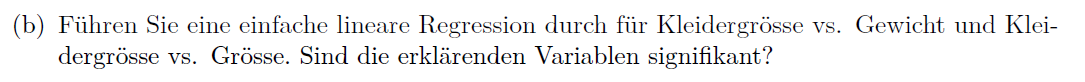

C:\Users\Si Ben Tran\daw\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         kleidergroesse   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              61.25
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                    8.04e-06
Time:                        15:46:36   Log-Likelihood:                         -49.073
No. Observations:                  12   AIC:                                      100.1
Df Residuals:                      11   BIC:                                      100.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gewicht        1.6613      0.212      7.827      0.000       1.194       2.128
==============================================================================
Omnibus:                        4.452   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                2.044
Skew:                          -0.997   Prob(JB):                        0.360
Kurtosis:                       3.330   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

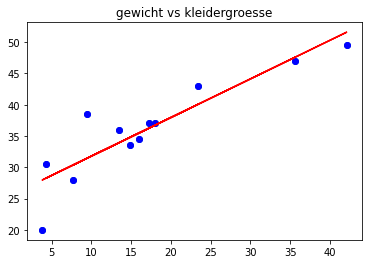

In [41]:
x = kleider["gewicht"].values.reshape(-1,1)
y = kleider["kleidergroesse"].values.reshape(-1,1)

plt.scatter(x, y)

model1 = LinearRegression().fit(x, y)
plt.scatter(x, y, color = "blue")
plt.plot(x, model1.coef_[0] * x + model1.intercept_, color = "red")
plt.title("gewicht vs kleidergroesse")

OLS(kleider.kleidergroesse, kleider.gewicht).fit().summary()

C:\Users\Si Ben Tran\daw\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         kleidergroesse   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              609.4
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                    5.53e-11
Time:                        15:46:32   Log-Likelihood:                         -36.172
No. Observations:                  12   AIC:                                      74.34
Df Residuals:                      11   BIC:                                      74.83
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
groesse        0.3486      0.014     24.686      0.000       0.317       0.380
==============================================================================
Omnibus:                        0.969   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                0.588
Skew:                           0.504   Prob(JB):                        0.745
Kurtosis:                       2.598   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

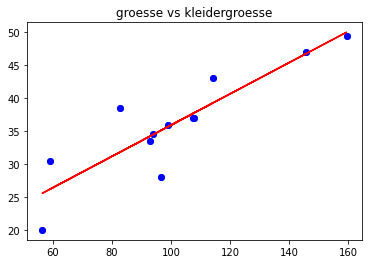

In [40]:
x = kleider["groesse"].values.reshape(-1,1)
y = kleider["kleidergroesse"].values.reshape(-1,1)

plt.scatter(x, y)

model1 = LinearRegression().fit(x, y)
plt.scatter(x, y, color = "blue")
plt.plot(x, model1.coef_[0] * x + model1.intercept_, color = "red")
plt.title("groesse vs kleidergroesse")

OLS(kleider.kleidergroesse, kleider.groesse).fit().summary()

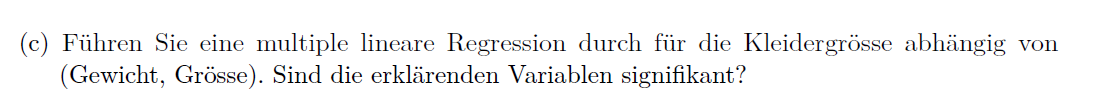

In [47]:
X = kleider[["groesse", "gewicht"]]
y = kleider[["kleidergroesse"]]
display(X, y)

,groesse,gewicht
1,107.4,18.0
2,159.4,42.1
3,94.1,16.0
4,99.1,13.5
5,114.2,23.4
6,96.6,7.7
7,107.9,17.3
8,56.5,3.8
9,92.9,14.9
10,59.0,4.3


,kleidergroesse
1,37.0
2,49.5
3,34.5
4,36.0
5,43.0
6,28.0
7,37.0
8,20.0
9,33.5
10,30.5


In [53]:
mlr_modell = LinearRegression().fit(X, y)
print("groesse und gewicht coefs", mlr_modell.coef_[0])
print("achsenabschnitt", mlr_modell.intercept_)

groesse und gewicht coefs [0.07681141 0.42752314]
achsenabschnitt [21.08526739]


In [62]:
X = sm.add_constant(X)

sm_mlr_modell = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         kleidergroesse   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     18.65
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           0.000630
Time:                        16:06:17   Log-Likelihood:                -31.757
No. Observations:                  12   AIC:                             69.51
Df Residuals:                       9   BIC:                             70.97
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.0853      8.770      2.404      0.0

C:\Users\Si Ben Tran\daw\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


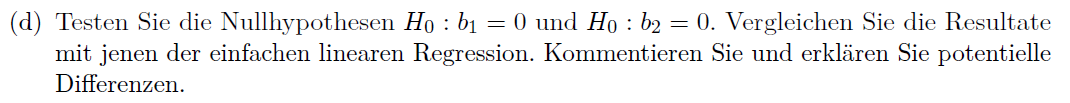